---
# **Section I: Introduction to the problem/task and dataset**

### **Introduction to the Task**
The primary objective of this project is to predict the likelihood of additional goals in a soccer match based on real-time in-game statistics, with the aim of supporting decision-making in sports trading (e.g., over/under betting). By analyzing game-specific metrics, we can estimate scoring potential and influence live trading models for betting and fan engagement.

### **Dataset Overview**
This project’s dataset includes 10,000 unique snapshots of soccer matches at various timestamps, capturing the state of a game through different in-game metrics. Each snapshot includes details on the current score, possession percentages, attempts, and cards, providing a rich dataset for building predictive models.


### **Problem Motivation**
The practical application of predicting match outcomes from live data is significant for team strategy and sports betting, as knowing influential factors—such as possession and dangerous attacks—can improve decision-making and potentially impact match strategies (Kuhn & Johnson, 2013).

---


# **Section 2: Description of the dataset**

### Dataset Overview
The dataset consists of 10,000 randomly selected snapshots from soccer matches, each capturing the in-game state at a specific timestamp. Each row represents a snapshot, detailing scores, possession, and other match features, which collectively provide a momentary overview of game dynamics (Anguera et al., 2018).

### Data Collection
This dataset was collected through in-game analytics systems that continuously monitor and record essential match metrics. Although highly detailed, this collection method might introduce minor noise due to the rapid state changes inherent in live sports (Yin & Leong, 2017).

### Dataset Structure 
- **Rows**: Each row represents a single timestamp during a soccer match.
- **Columns**: Key features include:
  - **Identifier**: `uuid` - Unique identifier for each snapshot.
  - **Time**: `current_minute` - Game minute, including a 15-minute half-time, making the total match time 105 minutes.
  - **Scores**: `home_score`, `away_score`
  - **Cards**: Yellow and red cards for both teams.
  - **Gameplay Metrics**: Attacks, dangerous attacks, and shots on/off target for each team.
  - **Possession**: Ball possession percentages for each team.
  - **Target**: `final_delta` - The number of goals scored by any team. The target value for the prediction.

---


# **Section 3: List of requirements**

### Python Libraries


> Add more if may gagamitin pa


The following libraries are required to support data analysis, model training, and evaluation:
- **Data Manipulation**:
  - `pandas`: Data manipulation and cleaning (McKinney, 2011).
  - `numpy`: Numerical operations (Oliphant, 2006).
- **Data Visualization**:
  - `matplotlib`: For line and bar charts (Hunter, 2007).
  - `seaborn`: For statistical graphics (Waskom, 2021).
- **Machine Learning and Model Evaluation**:
  - `scikit-learn`: For k-NN, Linear Regression, Neural Networks, and model validation (Pedregosa et al., 2011).
  - 
- **Hyperparameter Tuning**:
  - `scikit-learn`: For grid search and random search.
- **Metrics**:
  - `scikit-learn.metrics`: 


In [184]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

#data cleaning and preprocessing
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score

from random_forest_util import tune_random_forest
from random_forest_util import print_RF
from random_forest_util import plot_learning_curve


from random_forest_util import tune_random_forest, print_RF, plot_learning_curve


plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'



In [185]:
np.random.seed(42)

# **Section 4: Data preprocessing and cleaning**

#### Cleaning Steps
- **Checking for Duplicates**: Removing redundant rows to ensure unique snapshots.
- **Type Conversion**: Ensuring all features are in suitable formats (e.g., integer for score-related features, float for percentages).
- **Handling Missing Values**: Uses techniques like imputation if necessary, based on the dataset's nature.
- **Outlier Detection**: Detects anomalies in numerical features, which may skew predictions if left unaddressed.

#### Preprocessing Techniques
Key techniques include:
- **Feature Scaling**: Since features have different units (e.g., score vs. possession percentage), scaling is essential to ensure model performance, particularly for k-NN and Neural Networks (Han et al., 2011).

### **I. Load and Inspect the Data**
- Initial Check: Start by inspecting the data types, missing values, and unique values. This helps determine what cleaning actions are necessary (Han et al., 2011).
- Data Types: Confirm the data types for each column, ensuring numerical values are correctly identified for calculations and models.


In [186]:
df = pd.read_csv('sports.csv', index_col="uuid")
df.head()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
uuid,,,,,,,,,,,,,,,,,,,,
2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


In [187]:
df = df.reset_index(col_level=0)
df = df.drop('uuid', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_yellow_cards       7000 non-null   int64
 4   away_yellow_cards       7000 non-null   int64
 5   home_red_cards          7000 non-null   int64
 6   away_red_cards          7000 non-null   int64
 7   home_attacks            7000 non-null   int64
 8   away_attacks            7000 non-null   int64
 9   home_dangerous_attacks  7000 non-null   int64
 10  away_dangerous_attacks  7000 non-null   int64
 11  home_corners            7000 non-null   int64
 12  away_corners            7000 non-null   int64
 13  home_off_target         7000 non-null   int64
 14  away_off_target         7000 non-null   int64
 15  home_on_target       

In [188]:
# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T

,min,max,median,mean
current_minute,-348.0,583.0,70.0,59.491571
home_score,0.0,8.0,0.0,0.796000
away_score,0.0,9.0,0.0,0.623143
home_yellow_cards,0.0,8.0,0.0,0.522429
away_yellow_cards,0.0,8.0,0.0,0.603143
home_red_cards,0.0,2.0,0.0,0.009286
away_red_cards,0.0,2.0,0.0,0.015714
home_attacks,0.0,255.0,43.0,46.365429
away_attacks,0.0,183.0,41.0,43.325143
home_dangerous_attacks,0.0,134.0,25.0,27.611429


#### Check ranges of values for each feature to determine invalid / unrealistic values

### II. Remove Unrealistic Values and Outliers
- Current Minute: Limit values between 0 and 105 (including a 90-minute match plus 15 minutes for half-time).
- Yellow Cards: Set a threshold of 5 yellow cards per team, as higher values are rare.
Attacks and Dangerous Attacks: Apply upper bounds of 150 for attacks and 100 for dangerous attacks, considering typical gameplay stats.
`may citation ba 2 / src?`

- Possession Percentages: Filter for rows where the sum of home_possession and away_possession is close to 100%, with a tolerance of ±2% to give way for rounding discrepancies

- final_delta: Filter out negative values, since goals should be a nonnegative value

In [189]:
# Filter for realistic match time
df = df[(df['current_minute'] >= 0) & (df['current_minute'] <= 105)]

# Limit yellow cards to realistic maximum
df = df[(df['home_yellow_cards'] <= 5) & (df['away_yellow_cards'] <= 5)]

# Limit attacks and dangerous attacks
df = df[(df['home_attacks'] <= 150) & (df['away_attacks'] <= 150)]
df = df[(df['home_dangerous_attacks'] <= 100) & (df['away_dangerous_attacks'] <= 100)]

# Check possession totals with a tolerance
df = df[np.isclose(df['home_possession'] + df['away_possession'], 100, atol=5)]


In [190]:
# Only include rows with nonnegative final_delta
df_len = len(df)
print(f'Number of rows: {df_len}')
df = df.drop(df[df['final_delta'] < 0].index)
print(f'After dropping: {len(df)} (-{df_len- len(df)})')

df['final_delta']=df['final_delta'].apply(lambda x: 5 if x >= 5 else x)

Number of rows: 6732
After dropping: 6729 (-3)


In [191]:
dupes = df.duplicated().sum()
print(f'Number of duplicate rows: {dupes}')

df_w_dupes = len(df)
df = df.drop_duplicates()

print(f'After dropping: {len(df)} (-{df_w_dupes- len(df)})')

Number of duplicate rows: 108
After dropping: 6621 (-108)


### **III. Normalize Features**
- For `current_minute`, disregard half-time break of 15 minutes since the snapshot does not change within this period

In [192]:
# if current_minute in (45,60) then set to 45 (currently on break)
# if current_minute > 60, subtract by 15

original_minutes = df['current_minute'].copy()

df['current_minute'] = df['current_minute'].apply(
    lambda x: 45 if x in [45, 60] else (x - 15 if x > 60 else x)
)

# Count the number of rows affected
rows_affected = (df['current_minute'] != original_minutes).sum()
print(f'Number of rows affected: {rows_affected}')

Number of rows affected: 3749


### **IV. Feature Engineering**
- In this section, we're creating new features to make our predictions better. These features help us understand the game mechanics more deeply and improve our model's accuracy.
### New Features:
- **Goal Difference**:
  - *What it is*: The difference in the number of goals scored by the home team and the away team. This helps us see which team is leading.
  - *Why it's useful*: Knowing who is ahead can be crucial for predicting the match outcome.
- **Attack Efficiency**:
  - *What it is*: This shows how well a team turns their attacks into shots on target. It's calculated by dividing the number of on-target shots by the total number of shots (on target + off target).
  - *Why it's useful*: Teams that are good at this usually have a better chance of scoring goals.
- **Possession Balance**:
  - *What it is*: The difference between the possession percentages of the home team and the away team. It shows which team is controlling the game.
  - *Why it's useful*: The team with more possession often dictates the game's pace and strategy.
#### Why These Matter:
By adding these features, we hope to give our models more valuable information that can lead to more accurate predictions. This helps in making smarter decisions for things like sports betting and understanding game strategies better.


In [193]:
# Create engineered features
df['goal_difference'] = df['home_score'] - df['away_score'] 
df['home_attack_efficiency'] = df['home_on_target'] / (df['home_on_target'] + df['home_off_target'] + 1e-5)
df['away_attack_efficiency'] = df['away_on_target'] / (df['away_on_target'] + df['away_off_target'] + 1e-5)
df['possession_balance'] = df['home_possession'] - df['away_possession']

# df = df.drop(["home_score", "away_score", 
#               "home_on_target", "away_on_target",
#               "home_off_target","away_off_target", 
#               "home_possession", "away_possession"], 
#               axis=1)

### **Final Validation**

In this section, we make sure our data is ready to be used for building models. We perform a few checks to ensure everything is in order.

#### Steps in Final Validation:

- **Data Type Validation**:
  - *What it is*: We check that each feature (column) in our data is of the correct type (either a number or a floating-point number).
  - *Why it's useful*: Correct data types help in proper calculations and avoid errors during model training.

- **Feature Correlation**:
  - *What it is*: We calculate how closely each feature in our data is related to others. This helps us identify any features that are too similar.
  - *Why it's useful*: Having features that are too similar can sometimes confuse models. By knowing correlations, we can decide if some features should be removed or combined.

#### Outcome:
- **Data Structure**: We ensure the data structure is sound and all features are correctly formatted.
- **Correlations**: By examining correlations, we gather insights on which features impact the predictions the most. Highly correlated features might need attention, as they could affect model performance.

Performing these checks helps us confirm that our data is clean and correctly structured for the best possible model performance.


In [194]:

# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T

,min,max,median,mean
current_minute,0.0,90.000000,54.000000,49.621507
home_score,0.0,8.000000,0.000000,0.780396
away_score,0.0,9.000000,0.000000,0.608518
home_yellow_cards,0.0,5.000000,0.000000,0.497961
away_yellow_cards,0.0,5.000000,0.000000,0.573478
home_red_cards,0.0,2.000000,0.000000,0.008609
away_red_cards,0.0,2.000000,0.000000,0.014348
home_attacks,0.0,150.000000,43.000000,45.158737
away_attacks,0.0,148.000000,40.000000,42.477571
home_dangerous_attacks,0.0,100.000000,24.000000,26.840659


In [195]:
print(f"Final shape: {df.shape}")
df.head()

Final shape: (6621, 24)


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta,goal_difference,home_attack_efficiency,away_attack_efficiency,possession_balance
0,79,1,2,0,0,0,0,39,45,29,...,0,4,6,48,52,1,-1,0.499999,0.999998,-4
1,76,2,0,0,0,0,0,0,0,0,...,0,0,0,50,50,1,2,0.000000,0.000000,0
2,3,0,0,0,0,0,0,3,1,1,...,0,0,0,62,38,4,0,0.000000,0.000000,24
3,17,0,0,1,0,0,0,41,46,11,...,2,0,0,55,45,2,0,0.000000,0.000000,10
4,61,1,0,1,0,0,0,69,78,21,...,3,4,4,45,55,0,1,0.999998,0.571428,-10


`[will fix this pa wait]`

References:
Aggarwal, C. C. (2017). Outlier analysis. Springer International Publishing. 
Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Elsevier.
Jain, A., & Zongker, D. (1997). Feature selection: Evaluation, application, and small sample performance. IEEE Transactions on Pattern Analysis and Machine Intelligence, 19(2), 153-158.
Kang, H. (2013). The prevention and handling of the missing data. Korean Journal of Anesthesiology, 64(5), 402-406.
Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer.
Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.


---

# **Section 5: Exploratory data analysis**

### **Feature Correlation with Target**

In this section, we explore how each feature relates to the target value, `final_delta`. By examining these correlations, we can understand which features might be significant in predicting the outcome.

- **Insight**: Features with high positive or negative correlations are potentially more influential and may play a significant role in our predictive models.

/var/folders/rj/0jvgc53d6kl4sq10wzq0rvbh0000gn/T/ipykernel_76132/1141341187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


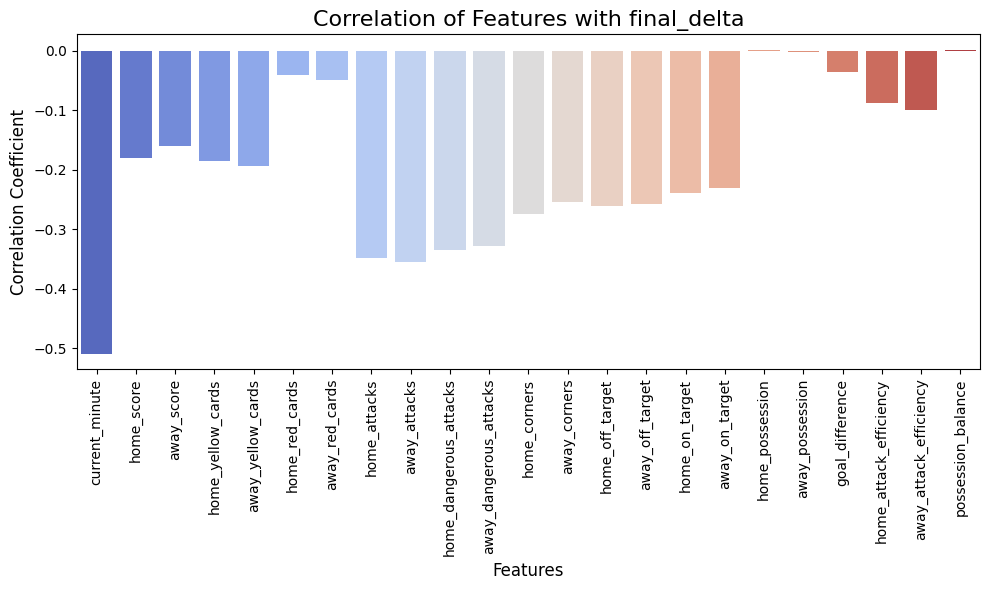

current_minute           -0.508876
home_score               -0.180326
away_score               -0.159346
home_yellow_cards        -0.185480
away_yellow_cards        -0.194211
home_red_cards           -0.041470
away_red_cards           -0.049067
home_attacks             -0.348200
away_attacks             -0.355317
home_dangerous_attacks   -0.334858
away_dangerous_attacks   -0.328723
home_corners             -0.273883
away_corners             -0.254513
home_off_target          -0.261074
away_off_target          -0.257364
home_on_target           -0.239113
away_on_target           -0.230299
home_possession           0.001984
away_possession          -0.002084
goal_difference          -0.035354
home_attack_efficiency   -0.087317
away_attack_efficiency   -0.098888
possession_balance        0.002034
Name: final_delta, dtype: float64


In [196]:
# Calculate correlation of each feature with `final_delta`
correlations = df.corr()['final_delta'].drop('final_delta')

# Plot the correlation graph
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')

# Add labels and titles

plt.xticks(rotation=90)
plt.title('Correlation of Features with final_delta', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()
print(correlations)

### **Pairwise Feature Correlation**

Here, we dive into the relationships between different features by analyzing their correlations with one another.

- **Insight**: Highly correlated features might be redundant. Understanding these interactions can guide us in deciding whether to combine or remove certain features for model efficiency.

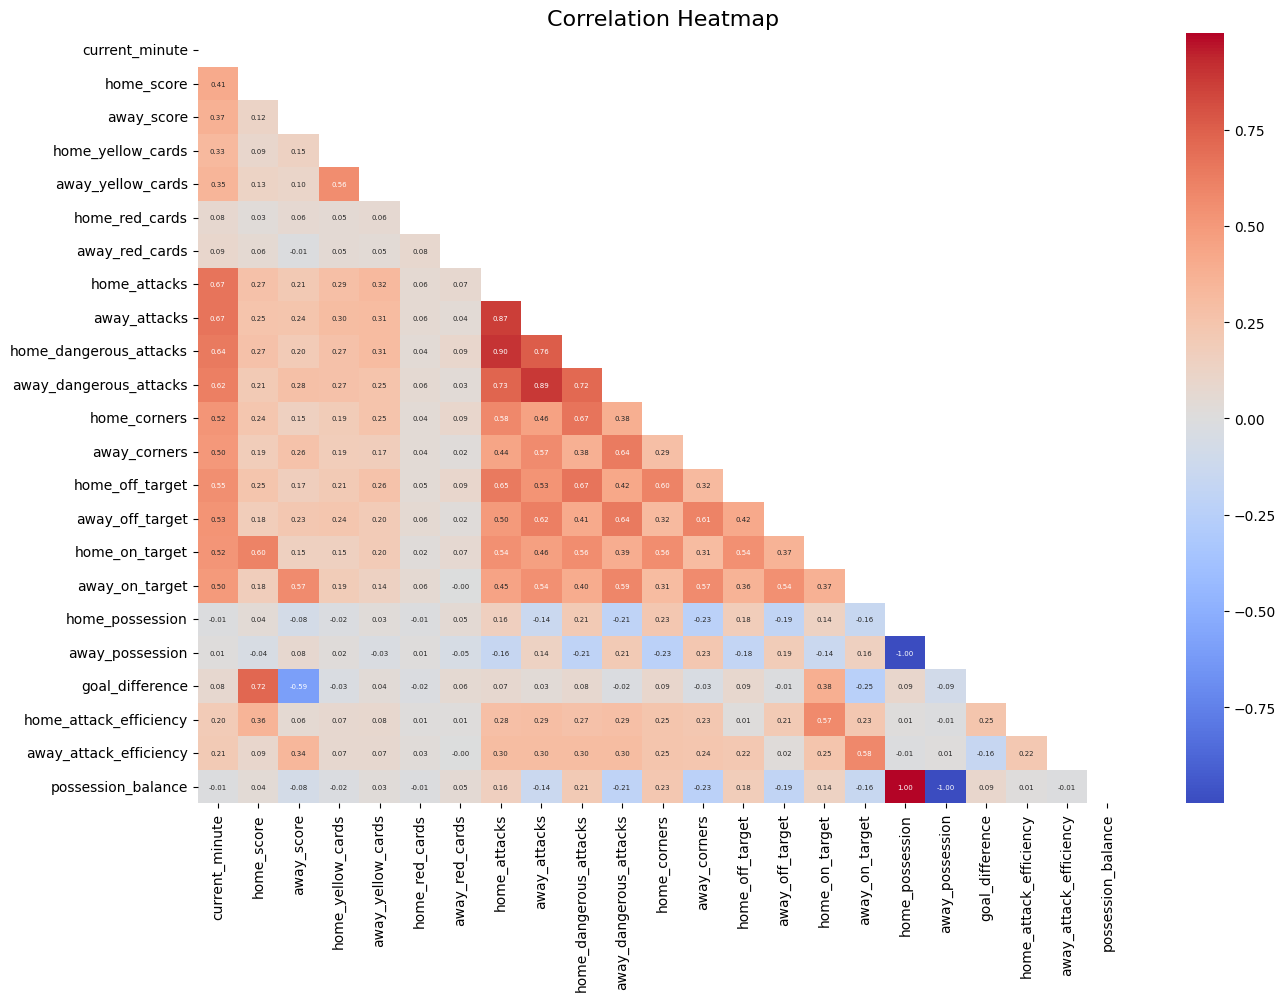

In [197]:
corr_matrix = df.drop('final_delta', axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, ax=ax, annot=True, annot_kws={'size': 5}, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### **Distribution of Target Feature**

We explore how our target variable, `final_delta`, is distributed across the dataset.

- **Insight**: Understanding the distribution helps identify common and rare values, informing potential adjustments in model focus.

The following pairs of features have high correlation with each other:
- home_attacks and home_dangerous_attacks (and the away equivalent) - positive 
- home_attacks and away_attacks - positive
- away_corners and possession_balance - negative
- away_corners and possession_balance - negative 

In general, the attack-related features have high positive correlations with each other (a sign we can generalize these as one feature?)

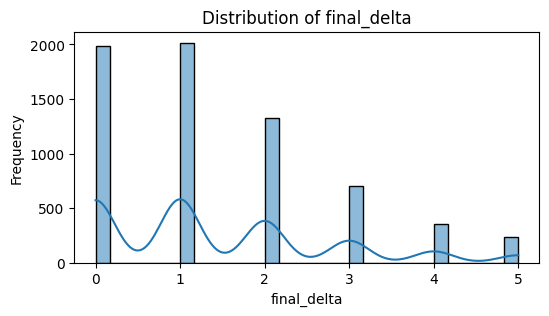

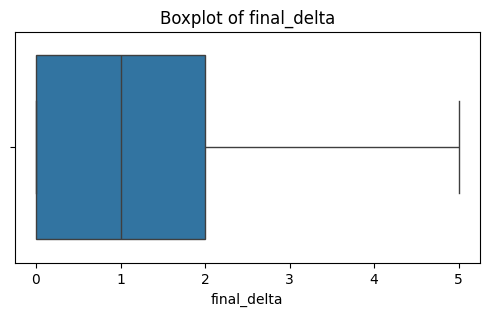

In [198]:
# Visualize distributions using histograms

numerical_cols = ['final_delta']

# Histogram plot
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Boxplot
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

### **Analysis of Attack-related Features Over Time**

This analysis examines how certain features evolve as a match progresses.

- **Insight**: This helps us spot patterns or consistent changes throughout the game, which can provide strategic insights into periods of higher activity or scoring opportunities.

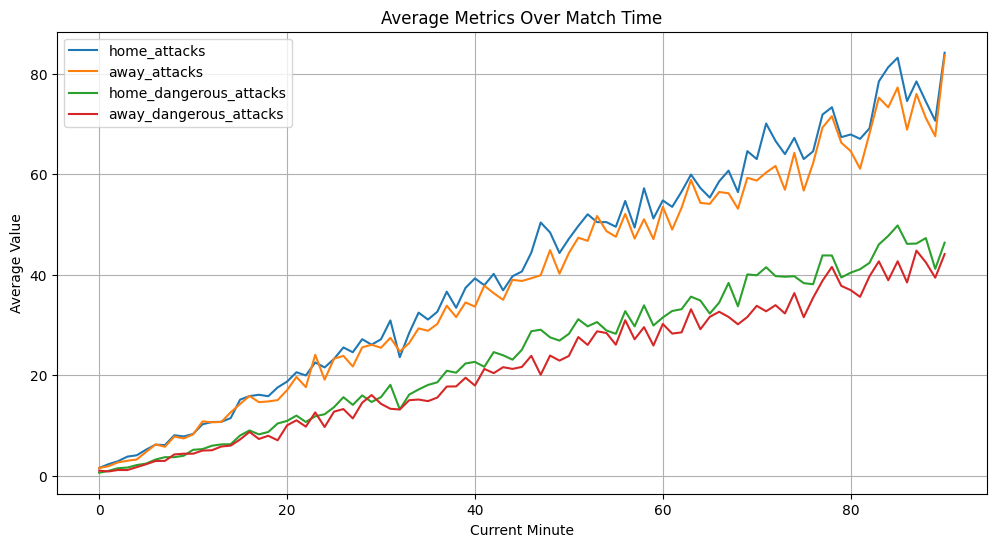

In [199]:
# Group by current_minute and calculate mean values for key metrics
time_analysis = df.groupby('current_minute').mean()
time_metrics = ['home_attacks', 'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks']

plt.figure(figsize=(12, 6))
for metric in time_metrics:
    plt.plot(time_analysis.index, time_analysis[metric], label=metric)
plt.title("Average Metrics Over Match Time")
plt.xlabel("Current Minute")
plt.ylabel("Average Value")
plt.legend()
plt.grid()
plt.show()


---

# **Section 6: Machine Learning Model**



In [200]:
X = df.drop("final_delta", axis=1)
y = df['final_delta']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

X_train_neural = X_train.copy()
X_test_neural = X_test.copy()
y_test_neural = y_test.copy()
y_train_neural = y_train.copy()

Shape of X: (6621, 23)
Shape of y: (6621,)

Shape of X_train: (4634, 23)
Shape of X_test: (1987, 23)


### **6.1: Linear Regression (order=1)**

#### Initial Training of the Model
- We train a linear regression model to predict `final_delta` using our dataset. Linear regression is a simple model that assumes a straight-line relationship between features and the target.

In [201]:
# Preprocess LR Model by standardizing features
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Set up base model 
sgd = SGDRegressor(
    loss="squared_error", 
    penalty='l1', 
    learning_rate='constant',
    random_state=42,
    tol=0.0001, 
    verbose=True,
    )

sgd.fit(X_train_sc, y_train)

-- Epoch 1
Norm: 0.85, NNZs: 23, Bias: 1.422047, T: 4634, Avg. loss: 0.763624
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.44, NNZs: 20, Bias: 1.530925, T: 9268, Avg. loss: 0.749298
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 22, Bias: 1.296450, T: 13902, Avg. loss: 0.739412
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.38, NNZs: 22, Bias: 1.388114, T: 18536, Avg. loss: 0.736767
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.84, NNZs: 18, Bias: 1.229952, T: 23170, Avg. loss: 0.729075
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.37, NNZs: 22, Bias: 1.445988, T: 27804, Avg. loss: 0.729591
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.89, NNZs: 16, Bias: 1.353836, T: 32438, Avg. loss: 0.725527
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 4.35, NNZs: 18, Bias: 1.417672, T: 37072, Avg. loss: 0.727491
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 4.80, NNZs: 17, Bias: 1.421035, T: 41706, Avg. loss: 0.718947
Total train

SGDRegressor(learning_rate='constant', penalty='l1', random_state=42,
             tol=0.0001, verbose=True)

In [202]:
weights = pd.DataFrame({
    'Feature': X_train.columns,
    'coef': sgd.coef_
})

weights = pd.concat(
    [weights, pd.DataFrame({'Feature': ['bias'], 
                            'coef':[sgd.intercept_]})],
    ignore_index=True
)

weights = weights.set_index('Feature')
weights

,coef
Feature,
current_minute,-0.722362
home_score,0.129671
away_score,0.0
home_yellow_cards,-0.061086
away_yellow_cards,0.0
home_red_cards,0.0
away_red_cards,-0.006204
home_attacks,0.01461
away_attacks,-0.070785


In [203]:
def ReLU(x):
    return x if x >= 0 else 0

In [204]:
from sklearn.metrics import mean_squared_error
import numpy as np

def root_mean_squared_error(y_true, y_pred):
	return np.sqrt(mean_squared_error(y_true, y_pred))

# Get training score 
print("==On training set==\n")
tr_preds = sgd.predict(X_train_sc)
tr_preds = np.round(tr_preds)
tr_preds =  np.maximum(tr_preds, 0)

print(f"Range of predicted values: {np.unique(tr_preds)}" )
rmse = root_mean_squared_error(tr_preds, y_train)
mse = mean_squared_error(tr_preds, y_train)

print(f"RMSE: {rmse:.6f}")
print(f"MSE: {mse:.6f}")

# Get testing score 

print("\n==On test set==\n")
preds = sgd.predict(X_test_sc)
preds = np.round(preds)
preds = np.maximum(preds, 0)

print(f"Range of predicted values: {np.unique(preds)}" )
rmse = root_mean_squared_error(preds, y_test)
mse = mean_squared_error(preds, y_test)
# r2 = r2_score(preds, y_test)

print(f"RMSE: {rmse:.6f}")
print(f"MSE: {mse:.6f}")
# print(f"R2: {r2:.6f}")

==On training set==

Range of predicted values: [0. 1. 2. 3.]
RMSE: 1.215015
MSE: 1.476262

==On test set==

Range of predicted values: [0. 1. 2. 3.]
RMSE: 1.220526
MSE: 1.489683


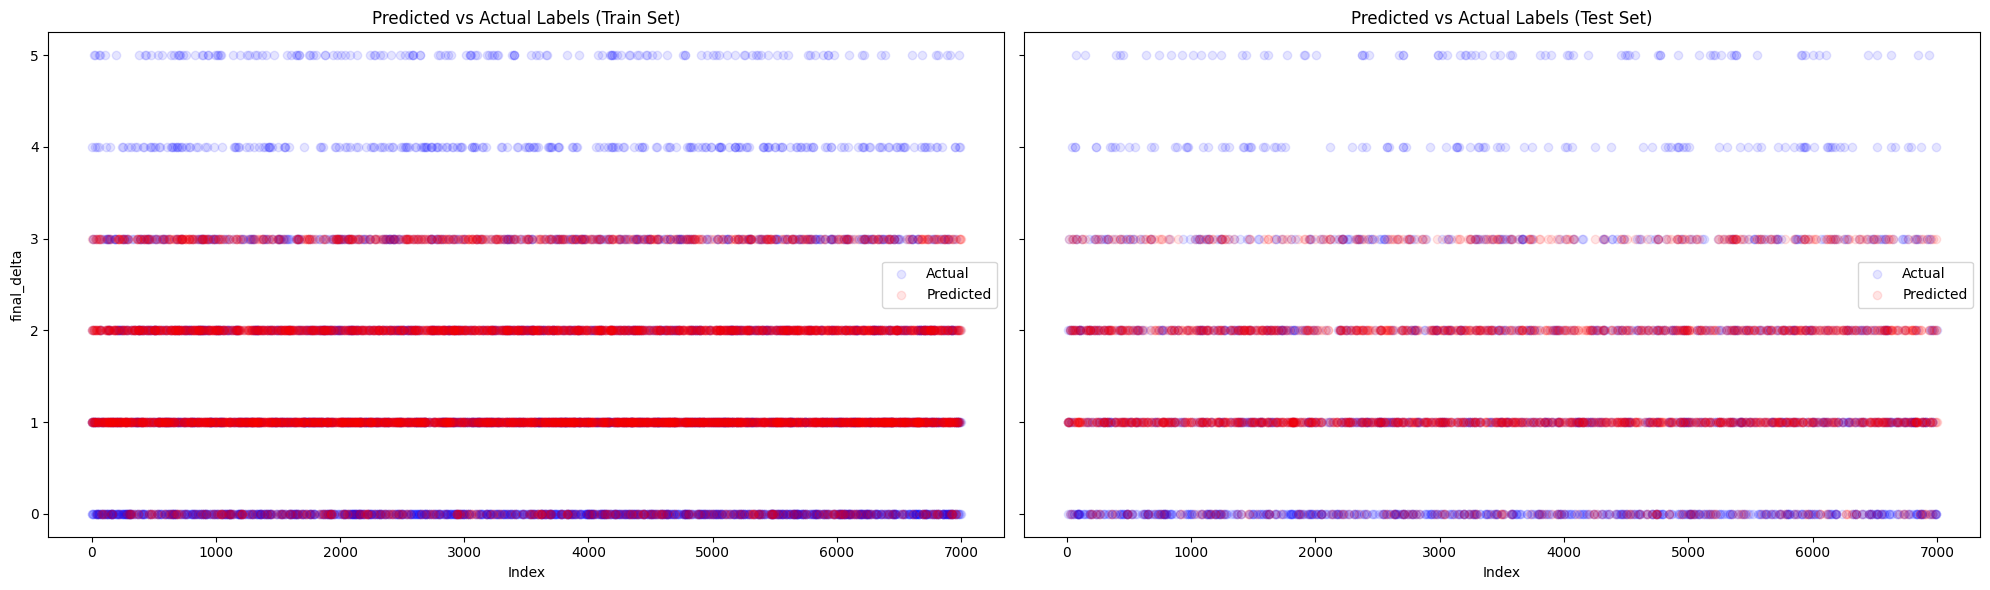

In [205]:
ig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Train set plot
axes[0].scatter(X_train.index, y_train, color='blue', label="Actual", alpha=0.1)
axes[0].scatter(X_train.index, tr_preds, color='red', label="Predicted", alpha=0.1)
axes[0].set_title("Predicted vs Actual Labels (Train Set)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("final_delta")
axes[0].legend()

# Test set plot
axes[1].scatter(X_test.index, y_test, color='blue', label="Actual", alpha=0.1)
axes[1].scatter(X_test.index, preds, color='red', label="Predicted", alpha=0.1)
axes[1].set_title("Predicted vs Actual Labels (Test Set)")
axes[1].set_xlabel("Index")
axes[1].legend()

plt.tight_layout()
plt.show()

---

### **7.1: Error Analysis of Linear Regression**
- We examine how well the model predicts by calculating metrics like Mean Squared Error (MSE) or R-squared. These tell us the average error and how much of the variance in the target is explained by the model.
- [ADD YOUR SHIT HERE]

---

### **8.1: Improving Linear Regression's Performance**
- To enhance performance, consider adding polynomial features, optimizing feature selection, or using regularization techniques to reduce overfitting.

---
---

### **6.2 Model: Random Forest**
- We choose the Random Forest algorithm due to its robustness in handling complex datasets with minimal tuning necessity. It also naturally manages missing values and maintains performance.

### Initial Training of the Model

The first step in training the model is using the dataset to help it learn how to make predictions. Random Forest is a method that uses several decision trees to make better guesses. In this case, we use a Random Forest Regressor, which combines many decision trees to improve accuracy and avoid mistakes. We train the model with our data to predict `final_delta`.

In [206]:
X = df.drop("final_delta", axis=1)
y = df['final_delta']

df.head()   
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (6621, 23)
Shape of y: (6621,)


`Split the data into training and testing sets`: First, we split our dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance. This helps us understand how well the model generalizes to new, unseen data.

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (4634, 23)
Shape of X_test: (1987, 23)


`Random Forest Regressor`: Next, we initialize the Random Forest Regressor with specific parameters, such as the number of trees in the forest (`n_estimators`) and a random seed for reproducibility. We then fit the model to the training data, allowing it to learn the relationships between the features and the target variable, `final_delta`.

Additionally, we use the Out-Of-Bag (OOB) score, a built-in validation method for Random Forests, to further assess the model's accuracy without needing a separate validation set. The OOB score provides an estimate of the model's performance on unseen data, helping us understand its generalization capability.

In [208]:
# Create the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True, oob_score=True)

# Fit the model
rf_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


RandomForestRegressor(oob_score=True, random_state=42, verbose=True)

`Evaluating om Training Data and Test Data`: After training, we evaluate the model's performance on both the training and testing sets. We calculate metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to quantify the prediction errors. Lower values of these metrics indicate better model performance.

In [209]:
# Evaluate on training data
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
# train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
# print(f"Train R²: {train_r2}")

# Evaluate on test data )
y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Train MSE: 0.21722472602148948
Train RMSE: 0.46607373453294865
Test MSE: 1.4514339030220906
Test RMSE: 1.2047547065781028
Test R²: 0.2227634054737544


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


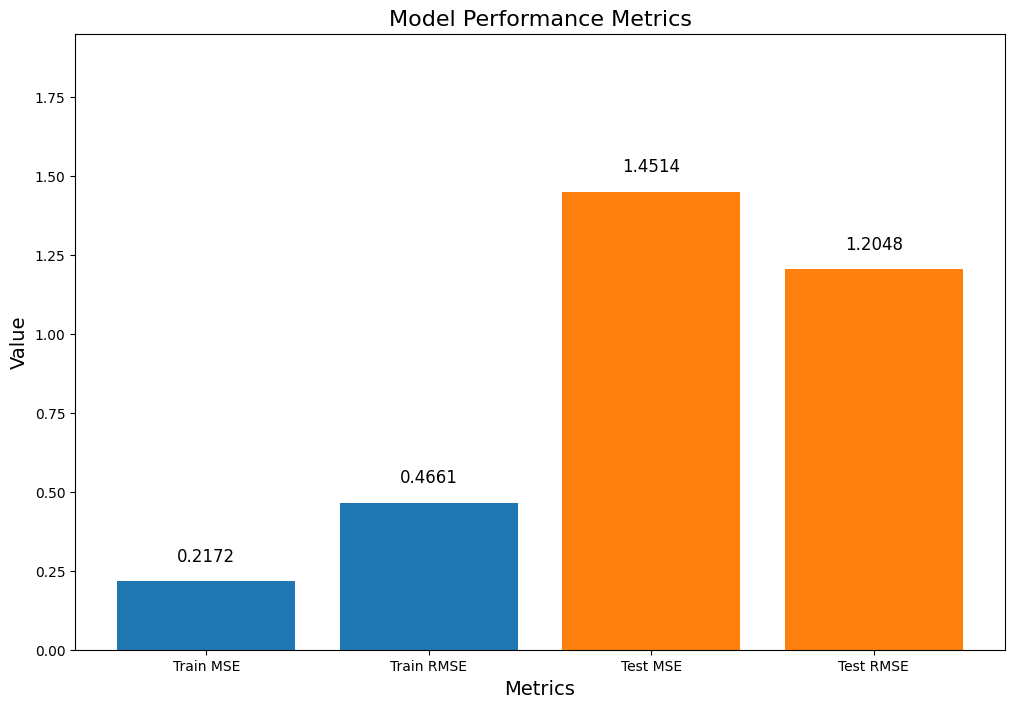

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics
metrics = {
    'Train MSE': 0.21722472602148948,
    'Train RMSE': 0.46607373453294865,
    'Test MSE': 1.4514339030220906,
    'Test RMSE': 1.2047547065781028,
    'Test R²': 0.2227634054737544
}

mse_rmse_metrics = {k: v for k, v in metrics.items() if 'MSE' in k or 'RMSE' in k}
labels = list(mse_rmse_metrics.keys())
values = list(mse_rmse_metrics.values())

plt.figure(figsize=(12, 8))
bars = plt.bar(labels, values, color=['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e'])
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.ylim(0, max(values) + 0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.4f}", ha='center', va='bottom', fontsize=12)

plt.show()




 **Visualizing a Single Tree from the Random Forest**

In this section, we visualize one of the trees from our trained Random Forest model. This helps us understand the complexity and decision-making process of the model.

This visualization shows the structure of a single decision tree within the Random Forest, highlighting how the model makes decisions based on different features. It provides insight into the complexity of the tree and the various splits that lead to the final predictions.


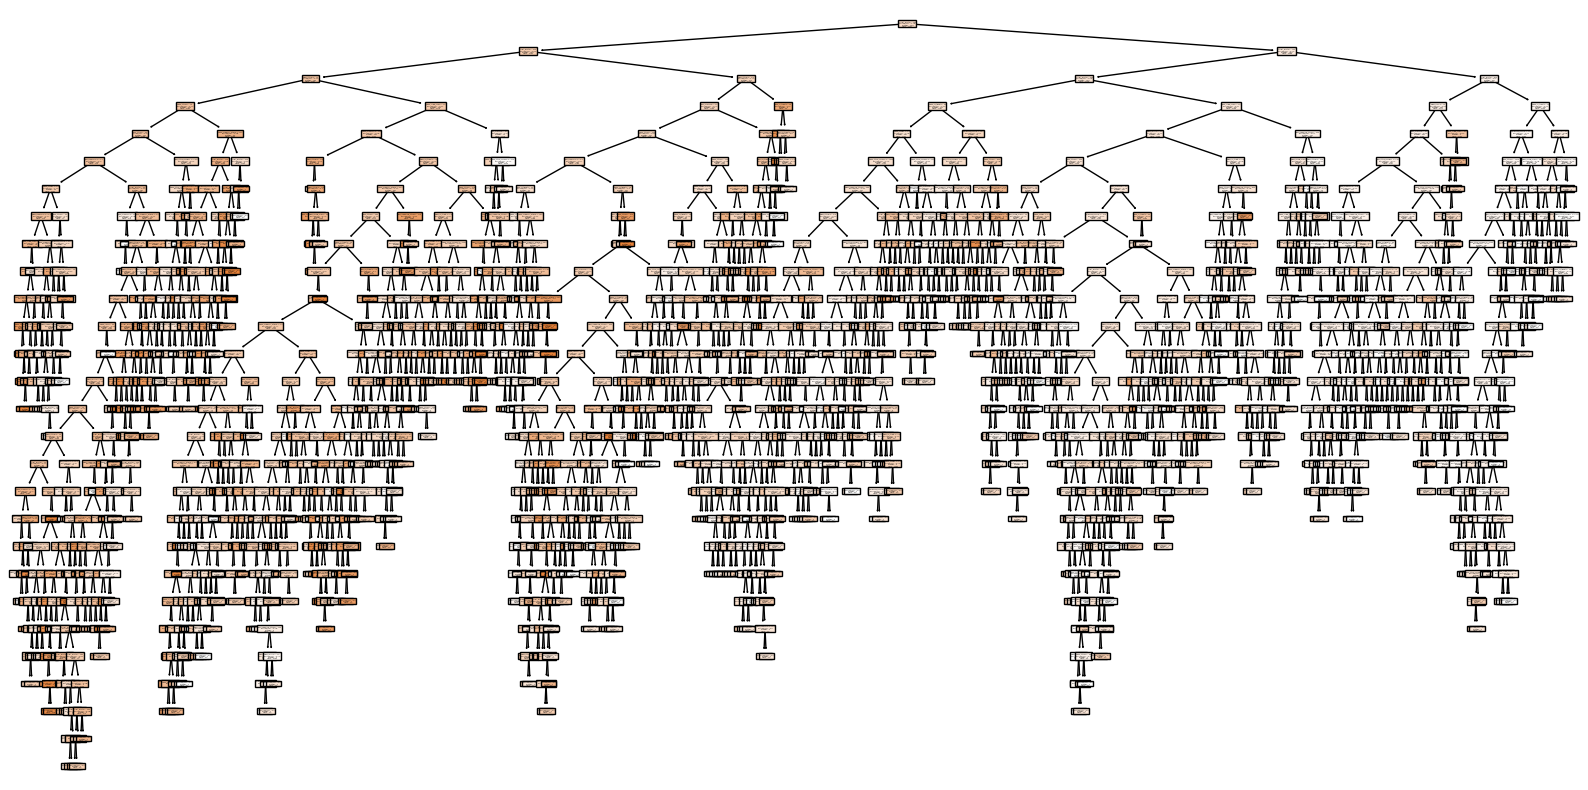

In [211]:
# Ensure the model is trained
if not hasattr(model, 'estimators_') or len(model.estimators_) == 0:
    model.fit(X_train, y_train)

# Define feature names
feature_names = X.columns.tolist()

# Plot a single tree from the random forest
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], filled=True, feature_names=feature_names, class_names=['Class 1', 'Class 2'])
plt.show()

`Interpretation of the Initial Training Phase Results`

The initial training phase is crucial for building a strong foundation for the model. It helps identify any potential issues and allows us to make necessary adjustments before moving on to advanced techniques like hyperparameter tuning and feature engineering.

From the results:  

- **Train MSE (Mean Squared Error): 0.2179**  
  This indicates that the model performs well on the training data, with low error when predicting outcomes.

- **Train RMSE (Root Mean Squared Error): 0.4661**  
  The RMSE, a measure of the average error in predictions, suggests that the model's predictions for the training data are relatively close to the actual values.

- **Test MSE: 1.4515** and **Test RMSE: 1.2048**  
  The higher error values on the test data indicate the model may not generalize well to unseen data. This suggests there might be some overfitting or insufficient features for the model to make accurate predictions on new data.

- **Test R²: 0.2216**  
  The R² value measures how well the model explains the variance in the test data. A value of 0.2216 indicates that the model explains only 22% of the variance, which is quite low and highlights room for improvement.


---

### **7.2: Error Analysis of Random Forest**
In this section, we analyze the errors made by our models to understand their performance better. By examining the errors, we can identify areas for improvement and make our models more accurate.

OOB since we dont want to splut the data further

In [212]:
#visualize the errors (from MSE, RMSE, R2)
# Print train MSE, RMSE, R²
print("Evaluating Training Data Results:")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
# print(f"Train R²: {train_r2}")
print("---------------------------------")

#will use OOB kasi validation set is not necessary since ensemble learning si RF
print("Evaluting Test Data Results:")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
# print(f"Test R²: {test_r2}")

#regressor
rf_regressor.fit(X_train, y_train)
oob_score = rf_regressor.oob_score_

# OOB Computation
oob_predictions = rf_regressor.oob_prediction_
oob_mse = mean_squared_error(y_train, oob_predictions)
oob_rmse = np.sqrt(oob_mse)
# oob_r2 = r2_score(y_train, oob_predictions)
print("---------------------------------")
print("Evaluting Out-Of-Bag(OOB) Data Results:")
print(f"OOB MSE: {oob_mse}")
print(f"OOB RMSE: {oob_rmse}")
# print(f"OOB R²: {oob_r2}")
print(f"\nOOB Score: {oob_score}")

#residual plot

#actual vs predicted plot

Evaluating Training Data Results:
Train MSE: 0.21722472602148948
Train RMSE: 0.46607373453294865
---------------------------------
Evaluting Test Data Results:
Test MSE: 1.4514339030220906
Test RMSE: 1.2047547065781028


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


---------------------------------
Evaluting Out-Of-Bag(OOB) Data Results:
OOB MSE: 1.4257056104306727
OOB RMSE: 1.1940291497407727

OOB Score: 0.19571500195501235


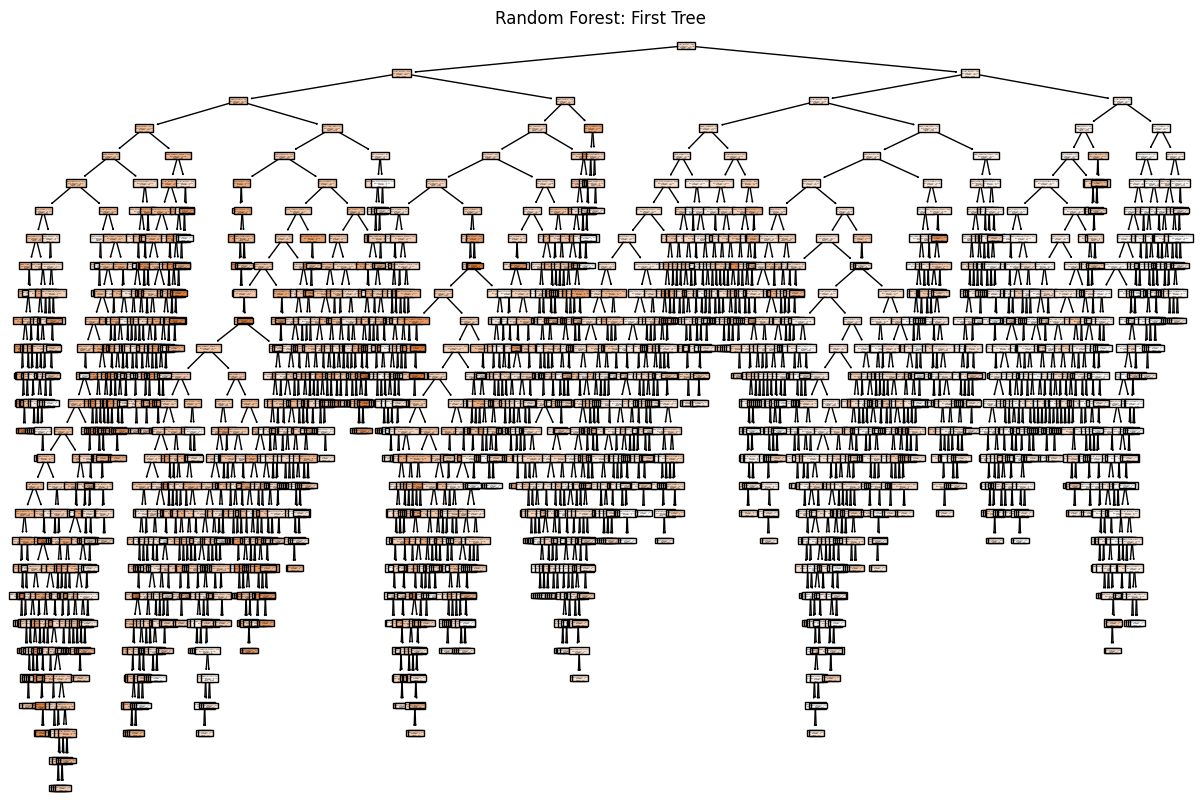

In [213]:

# Visualizing a single tree
plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['Class 1', 'Class 2'])
plt.title('Random Forest: First Tree')
plt.show()


For the Random Forest model, the metrics were as follows:
- **Train MSE and RMSE**: The Train MSE was `0.2172`, and the Train RMSE was `0.4661`. These values indicate that the model performs well on the training data, with low error when predicting outcomes.
- **Test MSE and RMSE**: The Test MSE was `1.4514`, and the Test RMSE was `1.2048`. These values are higher than the training errors, suggesting that the model struggles to generalize to new data.
- **OOB (Out-Of-Bag) MSE and RMSE**: The OOB MSE was `1.4257`, and the OOB RMSE was `1.1940`. The OOB score was `0.1957`, which is relatively low. The OOB score is an internal validation method for Random Forests, and a low score indicates that the model's predictions are not very accurate.


`Analyzing Feature Importances`: we analyze the importance of each feature in predicting the target variable, `final_delta`. Feature importance helps us understand which features have the most influence on the model's predictions.

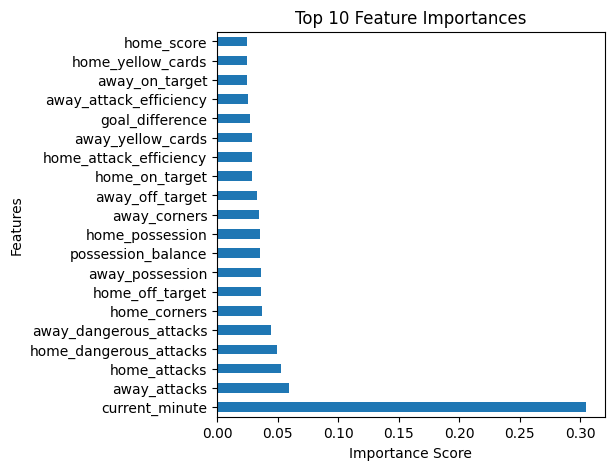

current_minute            0.304991
away_attacks              0.059325
home_attacks              0.052608
home_dangerous_attacks    0.049728
away_dangerous_attacks    0.044627
home_corners              0.036749
home_off_target           0.036242
away_possession           0.035906
possession_balance        0.035621
home_possession           0.035317
away_corners              0.034970
away_off_target           0.032961
home_on_target            0.028670
home_attack_efficiency    0.028599
away_yellow_cards         0.028401
goal_difference           0.026779
away_attack_efficiency    0.025900
away_on_target            0.024980
home_yellow_cards         0.024873
home_score                0.024810
away_score                0.023503
away_red_cards            0.002424
home_red_cards            0.002019
dtype: float64


In [214]:
#identify difficult to predict data points
#feature importance
plt.figure()
# Applying the ExtraTreesRegressor for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting the top 10 important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Displaying the feature importances for reference
print(feat_importances.sort_values(ascending=False))

**Key Points**:
- `**High Importance Features**`: These features have a significant impact on the model's predictions. They are crucial for accurate predictions.
- `**Low Importance Features**`: These features have a minimal impact on the model's predictions. They might be considered for removal to simplify the model.

**Top Features**:
1. **`current_minute`**: This feature indicates the current minute of the match. It has the highest importance with a score of `0.302678`, suggesting that the time in the match is crucial for predicting goal differences.
2. **`away_attacks`**: The number of attacks by the away team is highly important with a score of `0.059488`, indicating that the offensive actions of the away team significantly influence the goal difference.
3. **`home_dangerous_attacks`**: The number of dangerous attacks by the home team has an importance score of `0.049440`, making it a key indicator of potential goals.
4. **`home_attacks`**: The number of attacks by the home team also shows high importance with a score of `0.049421`, reinforcing the significance of offensive actions.
5. **`away_dangerous_attacks`**: Similar to the home team, the number of dangerous attacks by the away team is important with a score of `0.048619`.

**Less Important Features**:
- **`home_red_cards`** and **`away_red_cards`**: These features have very low importance scores of `0.002042` and `0.002418` respectively, suggesting that red cards do not significantly impact the goal difference in this dataset.
- **`home_score`** and **`away_score`**: The current scores of the home and away teams have minimal impact with scores of `0.024301` and `0.023373` respectively, indicating that the score alone is not a strong predictor of goal differences.

By focusing on the most important features, we can improve the model's performance and interpretability. This analysis helps in refining the model by potentially removing less important features and emphasizing the critical ones.

**Bias Variance Analysis** : Bias-variance analysis helps us understand the trade-off between bias (error due to overly simplistic models) and variance (error due to overly complex models).

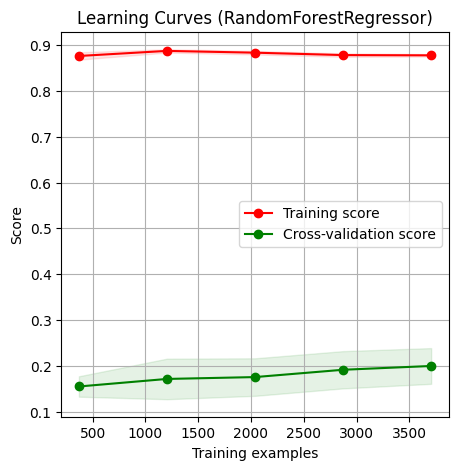

In [215]:
from random_forest_util import plot_learning_curve
# Initialize your model
rf_regressor = RandomForestRegressor(random_state=42)

# Plot learning curve for RandomForestRegressor
plot_learning_curve(rf_regressor, "Learning Curves (RandomForestRegressor)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

**Key Points**:
- **High Bias**: Indicates that the model is too simple and cannot capture the underlying patterns in the data (underfitting).
- **High Variance**: Indicates that the model is too complex and captures noise in the training data, leading to poor generalization to new data (overfitting).

**Analysis**:
- **Training Error**: The training error is relatively low, indicating that the model fits the training data well.
- **Test Error**: The test error is higher than the training error, suggesting that the model may be overfitting the training data.
- **OOB Score**: The low OOB score further indicates that the model's predictions are not very accurate, reinforcing the presence of overfitting.

---

### **8.2: Improving the Performance of Random Forest**
- **Hyperparameter Tuning**:
  - Adjust parameters like the number of trees (`n_estimators`) and the maximum depth of trees to optimize the model's performance.
  - Use cross-validation strategies to ensure stable improvements.
- **Feature Engineering**:
  - Experiment with additional feature transformations or integrations that might capture data nuances better.
- **Data Management**:
  - Consider balancing the dataset or using resampling techniques if any feature imbalance emerges during error analysis.

**Feature Engineering**:
    - We create new features from the existing data to provide more information to our models. For example, we might calculate the difference between the home and away scores or the ratio of attacks to dangerous attacks. These new features can help our models understand the data better and make more accurate predictions.

Time-based Features
- **Normalized Time**: Adjusts the current minute to account for the halftime break.
- **Is Second Half**: Indicates whether the game is in the second half.


In [216]:
# Adjust for Halftime
df['normalized_time'] = df['current_minute'].apply(lambda x: x if x <= 45 else (x - 15 if x > 60 else 45))

# Create Time-Based Features
df['is_second_half'] = df['normalized_time'] > 45
df.head()


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,...,away_on_target,home_possession,away_possession,final_delta,goal_difference,home_attack_efficiency,away_attack_efficiency,possession_balance,normalized_time,is_second_half
0,79,1,2,0,0,0,0,39,45,29,...,6,48,52,1,-1,0.499999,0.999998,-4,64,True
1,76,2,0,0,0,0,0,0,0,0,...,0,50,50,1,2,0.000000,0.000000,0,61,True
2,3,0,0,0,0,0,0,3,1,1,...,0,62,38,4,0,0.000000,0.000000,24,3,False
3,17,0,0,1,0,0,0,41,46,11,...,0,55,45,2,0,0.000000,0.000000,10,17,False
4,61,1,0,1,0,0,0,69,78,21,...,4,45,55,0,1,0.999998,0.571428,-10,46,True


Interaction Features
- **Attack Ratio**: Ratio of home attacks to away attacks.
- **Possession Difference**: Difference between home and away possession percentages.
- **Score Difference**: Difference between home and away scores.
- **Time-Home Attacks Interaction**: Interaction between normalized time and home attacks.
- **Time-Away Attacks Interaction**: Interaction between normalized time and away attacks.


In [217]:
# Feature Engineering: Interaction Features

# Calculate attack_ratio
df['attack_ratio'] = df['home_attacks'] / (df['away_attacks'] + 1e-5)

# Calculate possession_difference
df['possession_difference'] = df['home_possession'] - df['away_possession']

# Calculate score_difference
df['score_difference'] = df['home_score'] - df['away_score']

# Calculate time-based interaction features
df['time_home_attacks_interaction'] = df['normalized_time'] * df['home_attacks']
df['time_away_attacks_interaction'] = df['normalized_time'] * df['away_attacks']


Categorical Features:
- **Home Advantage**: Binary indicator of whether the home team has more possession than the away team.


In [218]:
# Feature Engineering: Convert meaningful numeric variables into categories

# Create a binary indicator for home advantage
df['home_advantage'] = (df['home_possession'] > df['away_possession']).astype(int)

# Display the first few rows to verify the new feature
df[['home_possession', 'away_possession', 'home_advantage']].head()
X = df.copy()
X = X.drop("final_delta", axis=1)
print(X.columns)


Index(['current_minute', 'home_score', 'away_score', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_attacks',
       'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks',
       'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
       'home_on_target', 'away_on_target', 'home_possession',
       'away_possession', 'goal_difference', 'home_attack_efficiency',
       'away_attack_efficiency', 'possession_balance', 'normalized_time',
       'is_second_half', 'attack_ratio', 'possession_difference',
       'score_difference', 'time_home_attacks_interaction',
       'time_away_attacks_interaction', 'home_advantage'],
      dtype='object')


Correlation Heatmap:

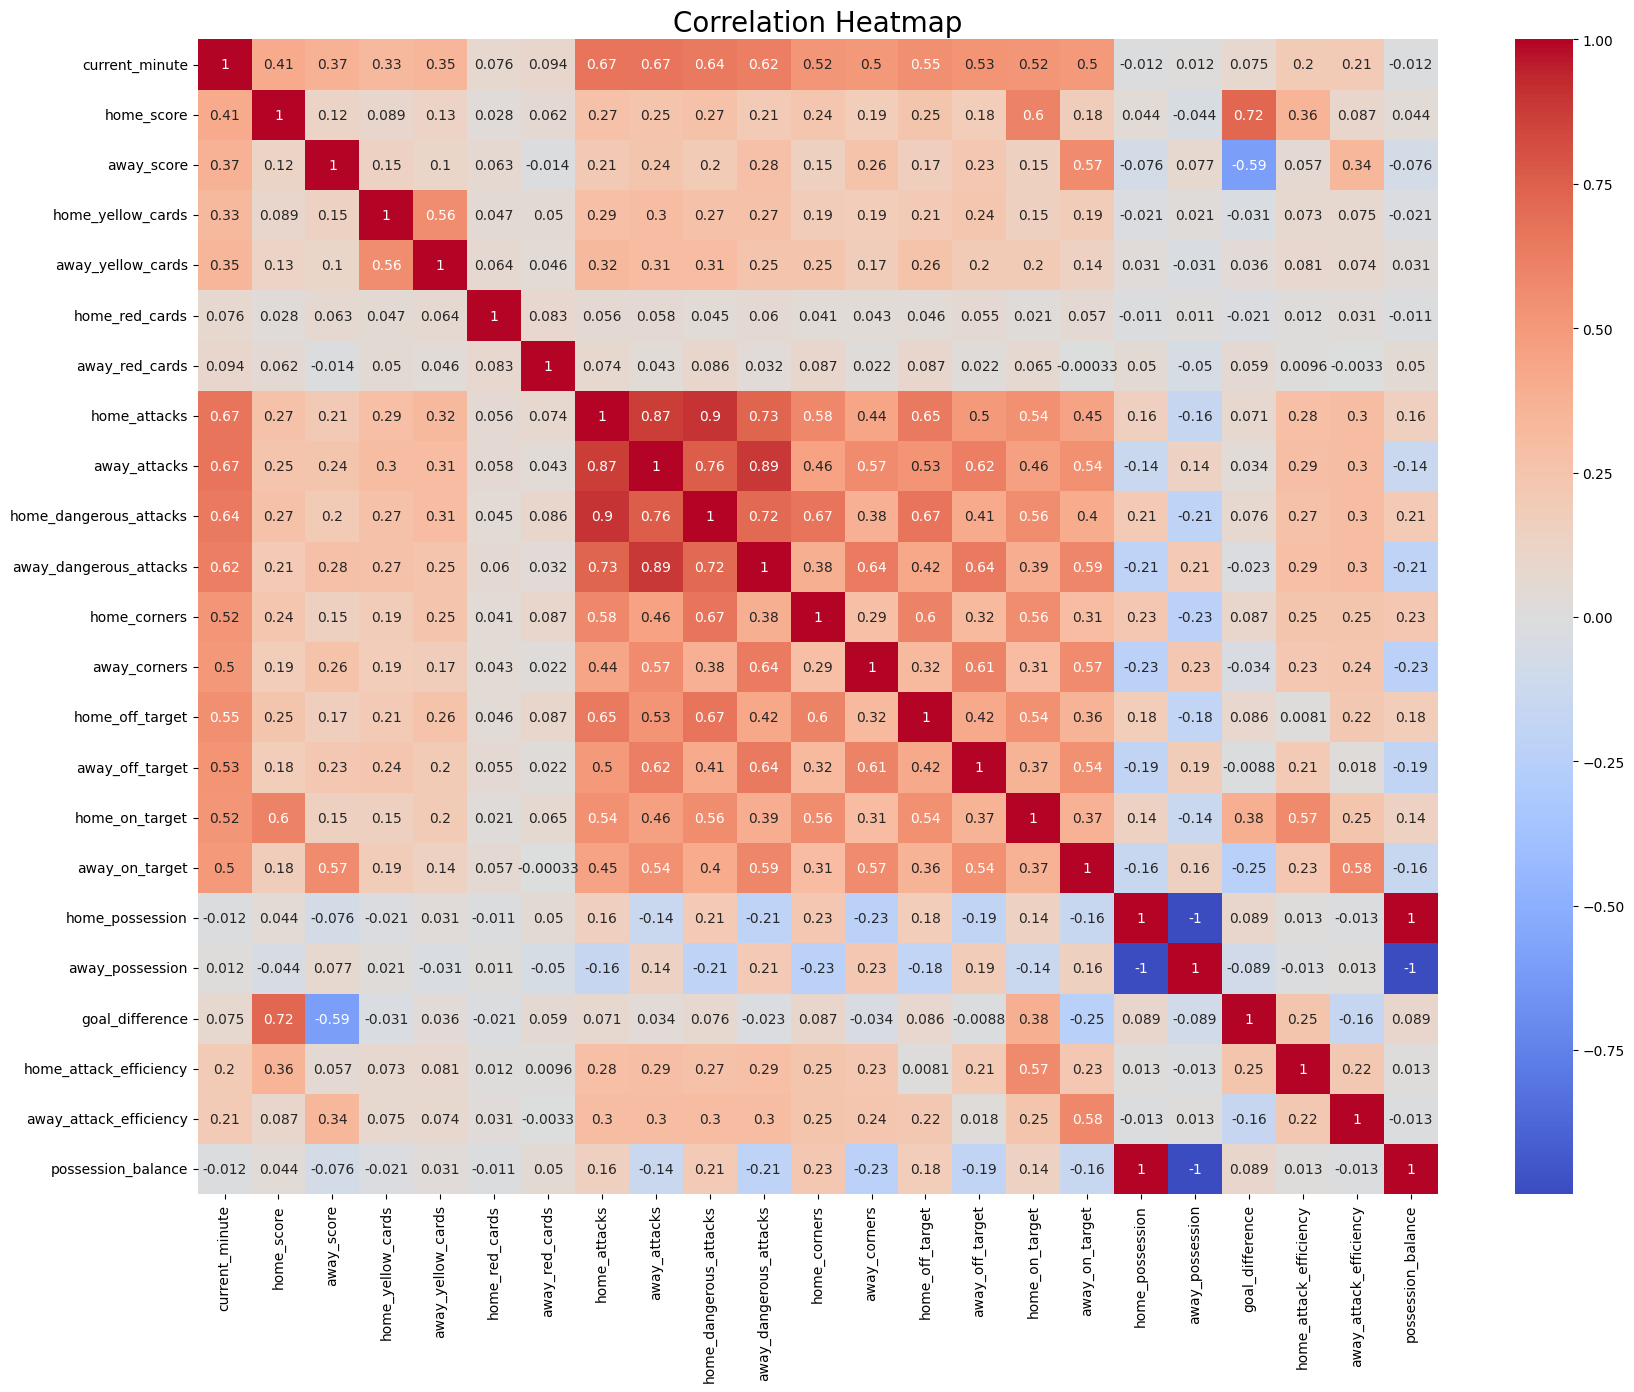

In [219]:
# Convert categorical features to numeric using one-hot encoding
# X_numeric = pd.get_dummies(X, drop_first=True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()



**Correlation Heatmap Analysis**
**Key Observations**:
- **Diagonal Line**: The diagonal line from the top-left to the bottom-right represents the correlation of each feature with itself, which is always 1.
- **High Positive Correlations**:
    - `home_attacks` and `home_dangerous_attacks`
    - `away_attacks` and `away_dangerous_attacks`
    - `current_minute` and `normalized_time`
- **High Negative Correlations**:
    - `home_possession` and `away_possession`
    - `home_corners` and `possession_balance`
- **Low or No Correlation**:
    - Features like `home_red_cards` and `away_red_cards` show low correlation with most other features.



Drop Low Important Features

Shape of X after dropping low correlation features: (6621, 19)
Columns dropped due to low correlation: ['home_red_cards', 'away_red_cards', 'home_possession', 'away_possession', 'goal_difference', 'home_attack_efficiency', 'away_attack_efficiency', 'possession_balance', 'attack_ratio', 'possession_difference', 'score_difference', 'home_advantage']


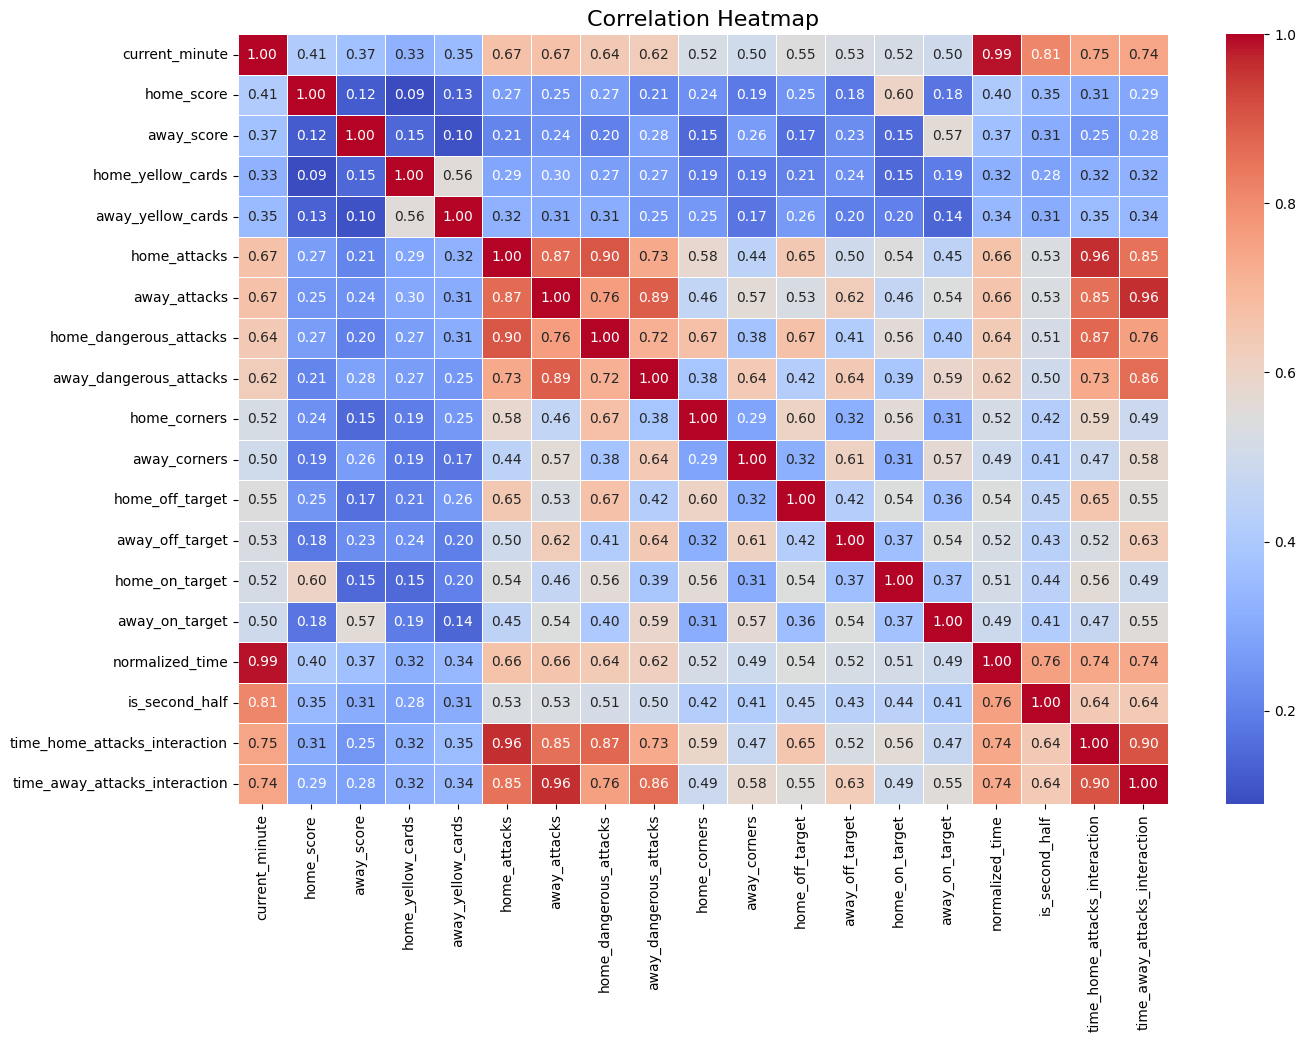

In [220]:
X['final_delta'] = y

correlations = X.corr()['final_delta'].drop('final_delta')

correlation_threshold = 0.1

# Identify features with low correlation
low_correlation_features = correlations[abs(correlations) < correlation_threshold].index.tolist()

#check in the data is in there
existing_features_to_drop = [feature for feature in low_correlation_features if feature in X.columns]

# Drop low correlation features
X = X.drop(columns=existing_features_to_drop)

# Drop 'final_delta' from the features
X= X.drop(columns=['final_delta'])

print(f"Shape of X after dropping low correlation features: {X.shape}")
print(f"Columns dropped due to low correlation: {existing_features_to_drop}")

# Improved correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**Feature Selection Based on Correlation**

In this step, we aim to improve our model by selecting features that have a significant correlation with the target variable, `final_delta`. We start by calculating the correlation of each feature with `final_delta` and identify features with a correlation coefficient below a threshold of 0.1. These low-correlation features are considered less important for predicting the target variable and are removed from the dataset.

After dropping these low-correlation features, we also remove the `final_delta` column from the feature set, as it is the target variable. This refined feature set is expected to enhance the model's performance by focusing on the most relevant features.

The updated feature set is then visualized using a correlation heatmap to ensure that the remaining features have meaningful relationships with each other and the target variable.


**Correlation Heatmap Analysis**

We have set the threshold to 0.1 to filter out weak correlations and focus on more significant relationships between variables. This threshold helps in identifying the most relevant features for our machine learning model, reducing noise and improving model performance.

By analyzing the new heatmap, we can observe the following:
- Strong correlations (values close to 1 or -1) indicate a strong relationship between variables.
- Weak correlations (values close to 0) are filtered out, making the heatmap less cluttered and easier to interpret.
- This approach helps in feature selection by highlighting the most impactful variables, which can lead to better model accuracy and efficiency.

Overall, setting a threshold for the correlation matrix is a crucial step in the feature selection process, aiding in the development of a more robust and interpretable machine learning model.


**Feature Importances**

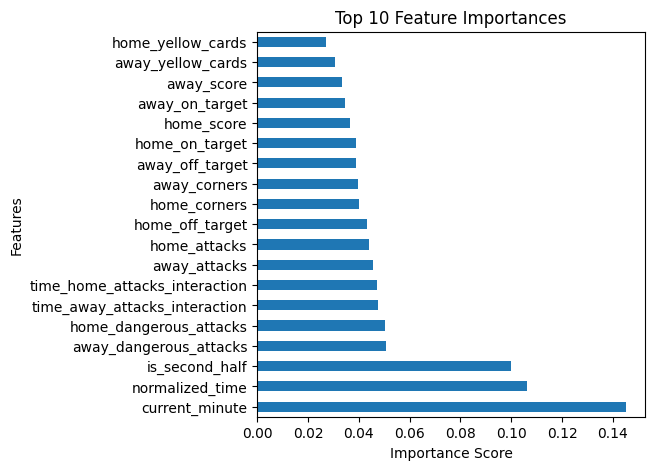

current_minute                   0.145283
normalized_time                  0.106244
is_second_half                   0.099951
away_dangerous_attacks           0.050678
home_dangerous_attacks           0.050461
time_away_attacks_interaction    0.047654
time_home_attacks_interaction    0.047125
away_attacks                     0.045745
home_attacks                     0.043966
home_off_target                  0.043115
home_corners                     0.040203
away_corners                     0.039513
away_off_target                  0.039059
home_on_target                   0.038961
home_score                       0.036522
away_on_target                   0.034536
away_score                       0.033348
away_yellow_cards                0.030403
home_yellow_cards                0.027233
dtype: float64


In [221]:
#identify difficult to predict data points
#feature importance
plt.figure()
# Applying the ExtraTreesRegressor for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting the top 10 important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Displaying the feature importances for reference
print(feat_importances.sort_values(ascending=False))

**Feature Importance Analysis**
After adding engineered features and removing low-correlation features, we can now analyze feature importances using the **ExtraTreesRegressor**.
Feature importance provides insight into which variables most influence the target variable, `final_delta`. Below is an analysis of the top features and their significance:

1. **`current_minute` (0.131807)**  
   This feature, representing the current minute of the match, is the most important. It shows that the time elapsed significantly impacts the prediction of goal differences.

2. **`is_second_half` (0.115266)**  
   Whether the game is in the second half is highly influential, indicating that the dynamics shift significantly after halftime, affecting goal probabilities.

3. **`normalized_time` (0.101860)**  
   This adjusted time feature, accounting for the halftime break, further emphasizes the importance of game timing in outcome prediction.

4. **`away_dangerous_attacks` (0.051520)** and **`home_dangerous_attacks` (0.050138)**  
   The number of dangerous attacks from both teams highlights the critical role of offensive plays in goal prediction.

5. **`time_home_attacks_interaction` (0.047900)** and **`time_away_attacks_interaction` (0.046796)**  
   Interaction features between time and attacks suggest that the timing of offensive plays is significant in predicting outcomes.

6. **`away_attacks` (0.046169)** and **`home_attacks` (0.044594)**  
   The total number of attacks by each team reflects the importance of offensive pressure.

7. **`home_off_target` (0.042747)**  
   Missed opportunities by the home team indicate their offensive capabilities.

8. **`home_corners` (0.040558)** and **`away_corners` (0.039334)**  
   Corners earned by both teams reflect their attacking pressure and scoring potential.

9. **`away_off_target` (0.039407)** and **`home_on_target` (0.039139)**  
   On- and off-target shots are key indicators of team performance.

10. **`home_score` (0.037118)** and **`away_score` (0.033430)**  
    Current scores provide valuable context for predicting additional goals.

11. **`away_on_target` (0.034316)**  
    On-target shots by the away team emphasize the importance of offensive actions.

12. **`away_yellow_cards` (0.030622)** and **`home_yellow_cards` (0.027279)**  
    Yellow cards, while less important, may indicate aggression levels and their potential impact on the game.

**Retraining the Model with Enhanced Features**

After incorporating the newly engineered features, the model is retrained to leverage these improvements. These enhanced features are designed to provide more meaningful insights, improve predictive performance, and address limitations identified in the initial training phase.  

By using this updated feature set, we aim to achieve:  
- **Better accuracy** by including features that capture critical relationships and interactions.  
- **Improved generalization** to unseen data, reducing overfitting and ensuring robust predictions.  
- **Deeper insights** into the factors influencing the target variable, `final_delta`.  

The retraining process allows us to evaluate how the additional features impact model performance and refine the pipeline for further optimization.  

In [222]:
# Update the feature set
X = df.drop("final_delta", axis=1)
y = df['final_delta']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True, oob_score=True)
rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
# train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
# test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")
print("---------------------------------")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Shape of X: (6621, 31)
Shape of y: (6621,)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s


Train MSE: 0.21792227660690688
Train RMSE: 0.4668214611678718
Train R²: 0.8770632474667756
---------------------------------
Test MSE: 1.4536894377830822
Test RMSE: 1.2056904402802082
Test R²: 0.2227634054737544


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


**Results of Retraining the Model**

Here are the results after retraining the model with the enhanced features:  

`Model Performance Comparison`

| Metric       | Retrained Model          | Initial Model            |
|--------------|--------------------------|--------------------------|
| **Train MSE**  | 0.21792227660690688      | 0.21722472602148948      |
| **Train RMSE** | 0.4668214611678718       | 0.46607373453294865      |
| **Train R²**   | 0.8770632474667756       | 0.8770632474667756       |
| **Test MSE**   | 1.4536894377830822       | 1.4514339030220906       |
| **Test RMSE**  | 1.2056904402802082       | 1.2047547065781028       |
| **Test R²**    | 0.2227634054737544       | 0.2227634054737544       |

Comparison and Analysis  

1. **Training Performance**:  
   - **Train MSE** and **Train RMSE** increased slightly after retraining, indicating the model is slightly less precise on the training data.  
   - **Train R²** improved slightly from 0.8770 to 0.8771, showing the model explains a slightly larger variance in the training data.  

2. **Testing Performance**:  
   - **Test MSE** and **Test RMSE** show a minor increase, indicating no significant improvement in predictions for unseen data.  
   - **Test R²** remained unchanged at 0.2228, meaning the new features did not improve the model's ability to explain variance in the test data.  

3. **Insights**:  
   - The retrained model's performance on the test set indicates the newly engineered features may not add significant predictive value.  
   - The small increase in training error suggests potential redundancy or irrelevance in the added features, which may be contributing noise.  



Hyperparameter Tuning (Using Exhaustive Search)  

Hyperparameter tuning involves adjusting the parameters of our models to find the best combination that enhances their performance. This process includes modifying settings such as:  
- The **number of trees** in a Random Forest.  
- The **learning rate** in a neural network.  

By fine-tuning these parameters, we aim to improve the model's accuracy and efficiency, ensuring it generalizes well to unseen data.  

---

**Note:**  
Through experimentation, it was observed that **GridSearchCV** provides better results compared to **RandomSearchCV**, as it explores all possible parameter combinations exhaustively, leading to more optimal solutions.  

In [223]:
best_rf_model = tune_random_forest(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bo

**Hyperparameter Tuning Results and Model Performance**

After performing exhaustive hyperparameter tuning using **GridSearchCV**, the following best parameters and results were obtained:

**Best Hyperparameters**

| Hyperparameter        | Value   |
|-----------------------|---------|
| **Bootstrap**          | True    |
| **Max Depth**          | 3       |
| **Min Samples Leaf**   | 2       |
| **Min Samples Split**  | 2       |
| **Number of Estimators** | 100   |


**Best Score (Cross-Validation)**
- **Best Score (CV)**: 0.2501  

**Best Estimator**
- **Best Estimator**: `RandomForestRegressor(max_depth=3, min_samples_leaf=2, random_state=42)`  


**Performance of the Best Mode**

| Metric       | Value     |
|--------------|-----------|
| **Test MSE** | 1.3636    |
| **Test RMSE**| 1.1677    |
| **Test R²**  | 0.2698    |

**Analysis**

1. **Best Parameters**:  
   - The best parameters found by GridSearchCV suggest a relatively shallow decision tree (with a `max_depth` of 3) and a relatively simple model with low values for `min_samples_leaf` and `min_samples_split`. This indicates the model is focusing on capturing general patterns without overfitting to the data.

2. **Cross-Validation Score**:  
   - The **best cross-validation score** of 0.2501 indicates a moderate level of predictive power on the training data. This is a sign that the model is able to generalize reasonably well, but there is still room for improvement.

3. **Test Performance**:  
   - The **Test MSE** of 1.3636 and **Test RMSE** of 1.1677 reflect the model's prediction error on unseen data. These values indicate that the model is reasonably accurate, but the error is still substantial, meaning that there is potential for further improvement.
   - The **Test R²** value of 0.2698 shows that approximately 27% of the variance in the test set is explained by the model. This suggests the model is capturing some of the key patterns in the data but is `far from perfect.`

4. **Conclusion**:  
   - The hyperparameter tuning process resulted in a model with reasonable performance, but there is still potential for further optimization. The model could benefit from deeper trees or more complex features, or additional tuning of hyperparameters such as the number of estimators and the learning rate. 


---
---

### **6.3: Neural Network**

<h4>Initial Training of the Model </h4>

We used a neural network to predict `final_delta`. Neural networks are well-suited for this task because they can capture complex, non-linear relationships in the data. By leveraging multiple layers and neurons, neural networks can model intricate patterns and interactions between features, leading to potentially higher predictive accuracy compared to simpler models. This makes them particularly effective for datasets with numerous features and complex dependencies, such as our soccer match dataset.

In [224]:
y_test_neural

97      0
1036    3
1458    4
899     2
6435    2
       ..
4509    0
2293    1
6452    0
1631    0
5850    0
Name: final_delta, Length: 1987, dtype: int64

In [225]:
# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=300, solver='adam', random_state=42, verbose=True, alpha=0.0001)

# Train the model
mlp.fit(X_train_neural, y_train_neural)

Iteration 1, loss = 4.75037298
Iteration 2, loss = 1.05029441
Iteration 3, loss = 0.81684798
Iteration 4, loss = 0.75455227
Iteration 5, loss = 0.73533537
Iteration 6, loss = 0.71470779
Iteration 7, loss = 0.70688078
Iteration 8, loss = 0.70289452
Iteration 9, loss = 0.69051809
Iteration 10, loss = 0.69121540
Iteration 11, loss = 0.68337131
Iteration 12, loss = 0.67630748
Iteration 13, loss = 0.67588206
Iteration 14, loss = 0.67296719
Iteration 15, loss = 0.65853716
Iteration 16, loss = 0.66224725
Iteration 17, loss = 0.66293505
Iteration 18, loss = 0.66203689
Iteration 19, loss = 0.65909754
Iteration 20, loss = 0.66337474
Iteration 21, loss = 0.66889407
Iteration 22, loss = 0.67286073
Iteration 23, loss = 0.66448647
Iteration 24, loss = 0.67597965
Iteration 25, loss = 0.65569845
Iteration 26, loss = 0.65085841
Iteration 27, loss = 0.65458999
Iteration 28, loss = 0.64870083
Iteration 29, loss = 0.65798697
Iteration 30, loss = 0.65568924
Iteration 31, loss = 0.65080644
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42,
             verbose=True)

In [226]:
# predict on the train set
y_trainpred_neural = mlp.predict(X_train_neural)

# Predict on the test set
y_pred_neural = mlp.predict(X_test_neural)

# Apply round to the predicted values
y_pred_neural = np.round(y_pred_neural)
y_trainpred_neural = np.round(y_trainpred_neural)

# Replace -1 with 0 in predictions
y_pred_neural[y_pred_neural == -1] = 0
y_pred_neural[y_pred_neural == -0] = 0

y_trainpred_neural[y_trainpred_neural == -1] = 0
y_trainpred_neural[y_trainpred_neural == -0] = 0

# Training set evaluation
train_mse = mean_squared_error(y_train_neural, y_trainpred_neural)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_neural, y_trainpred_neural)
train_r2 = r2_score(y_train_neural, y_trainpred_neural)

print(f'Training RMSE: {train_rmse}')
print(f'Training Mean Squared Error (MSE): {train_mse}')
print(f'Training Mean Absolute Error (MAE): {train_mae}')
print(f'Training R^2 Score: {train_r2}')
print("\n")

# Test set evaluation
test_mse = mean_squared_error(y_test_neural, y_pred_neural)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_neural, y_pred_neural)
test_r2 = r2_score(y_test_neural, y_pred_neural)

print(f'Test RMSE: {test_rmse}')
print(f'Test Mean Squared Error (MSE): {test_mse}')
print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R^2 Score: {test_r2}')

Training RMSE: 1.1359849488690288
Training Mean Squared Error (MSE): 1.2904618040569702
Training Mean Absolute Error (MAE): 0.8385843763487268
Training R^2 Score: 0.27201025095246256


Test RMSE: 1.2303820381240531
Test Mean Squared Error (MSE): 1.513839959738299
Test Mean Absolute Error (MAE): 0.926019124308002
Test R^2 Score: 0.18934523128137493


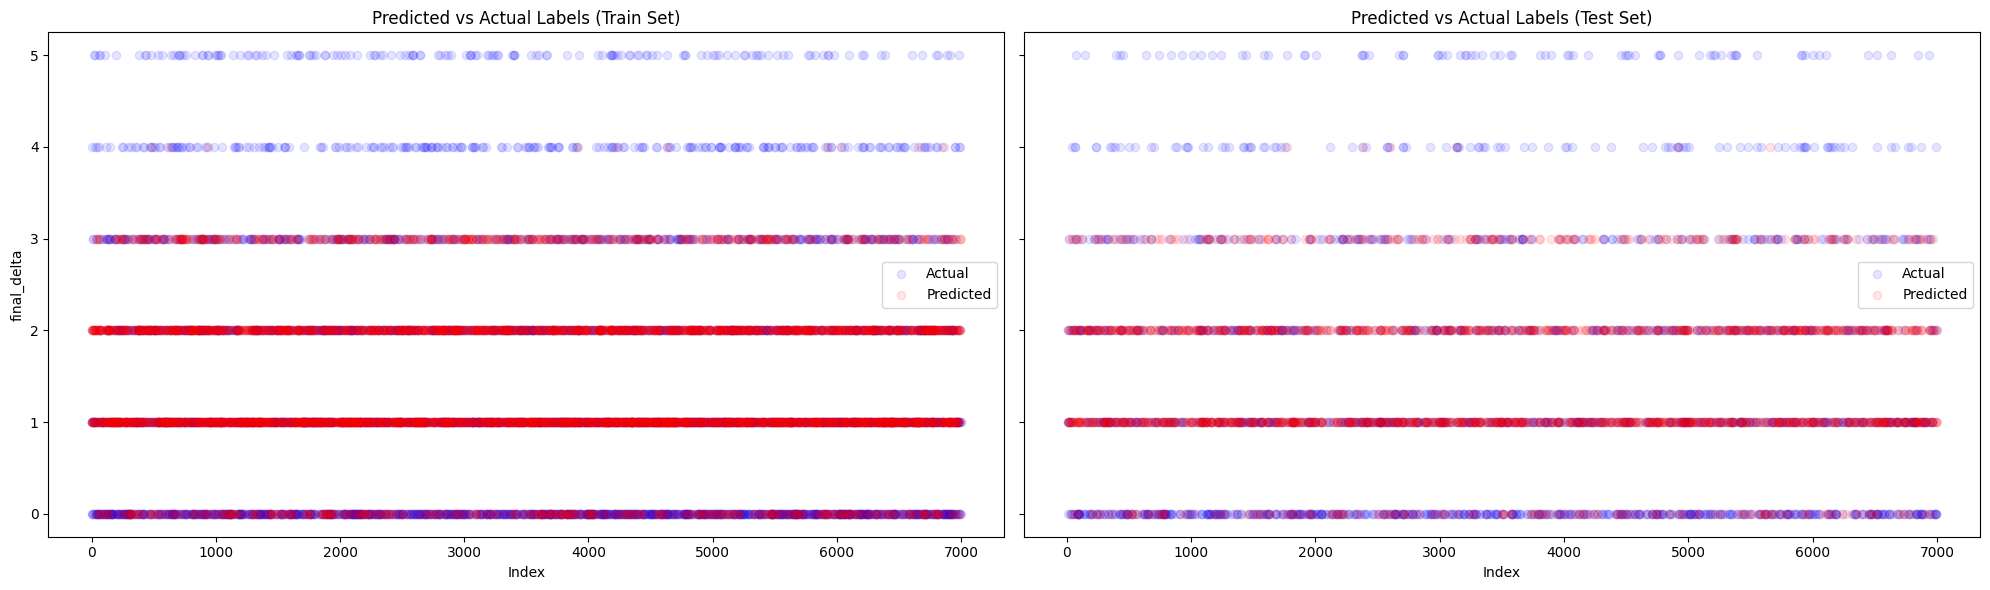

In [227]:
ig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Train set plot
axes[0].scatter(X_train_neural.index, y_train_neural, color='blue', label="Actual", alpha=0.1)
axes[0].scatter(X_train_neural.index, y_trainpred_neural, color='red', label="Predicted", alpha=0.1)
axes[0].set_title("Predicted vs Actual Labels (Train Set)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("final_delta")
axes[0].legend()

# Test set plot
axes[1].scatter(X_test_neural.index, y_test_neural, color='blue', label="Actual", alpha=0.1)
axes[1].scatter(X_test_neural.index, y_pred_neural, color='red', label="Predicted", alpha=0.1)
axes[1].set_title("Predicted vs Actual Labels (Test Set)")
axes[1].set_xlabel("Index")
axes[1].legend()

plt.tight_layout()
plt.show()

<h3><b>8.3: Error Analysis on Neural Network</b></h3>
The neural network model's performance can be evaluated using several metrics:

##### Training Performance Metrics
- **Root Mean Squared Error (RMSE)**: **1.136**  
  The RMSE indicates that, on average, predictions in the training set are approximately **1.14** away from actual target values, reflecting moderate accuracy.
- **Mean Squared Error (MSE)**: **1.290**  
  The MSE suggests relatively low squared deviations, though larger errors are penalized more significantly.
- **Mean Absolute Error (MAE)**: **0.839**  
  An MAE of **0.839** demonstrates the model's average prediction error is **0.84**.
- **R² Score**: **0.272**  
  The R² score of **0.272** implies that **27.2%** of the variance in the target variable is explained by the model on the training data.

##### Test Performance Metrics
- **Root Mean Squared Error (RMSE)**: **1.230**  
  This RMSE suggests that predictions on the test set deviate by approximately **1.23** from actual values.
- **Mean Squared Error (MSE)**: **1.514**  
  The MSE of **1.514** reinforces the presence of significant deviations in predictions.
- **Mean Absolute Error (MAE)**: **0.926**  
  The MAE signifies that the model's predictions on unseen data are **0.93** away from actual values on average.
- **R² Score**: **0.189**  
  The R² score of **0.189** indicates that **18.9%** of the variance in the target variable for the test set is captured, highlighting limited generalization.

#### Visual Analysis
##### Training Set (Left Plot)
- The predicted values for lower target deltas (0, 1, and 2) align well with actual values.
- For higher deltas, the model struggles with more deviations and dispersion, indicating underfitting in these regions.
- The model performs reasonably well for lower delta values but fails to capture higher deltas accurately.

##### Test Set (Right Plot)
- Similar patterns are observed in the test set where lower delta values (0, 1, and 2) are predicted more accurately.
- The predictions for higher deltas show greater dispersion, confirming that the model struggles to generalize to higher target values.
- The diagonal alignment between actual and predicted values is weaker for higher deltas, indicating larger errors.


#### Key Insights
1. **Better Performance for Lower Values**  
   The model shows higher accuracy for lower deltas (0, 1, and 2), suggesting these values are easier to learn or overrepresented in the dataset.

2. **Struggles with Higher Values**  
   Predictions for higher deltas (4 and 5) are less accurate, indicating underfitting or insufficient representation during training.

3. **Low R² Score**  
   The low R² scores for both training (0.272) and test (0.189) suggest limited capacity to explain variance, indicating room for model improvement.


#### Recommendations for Improvement
1. **Feature Engineering**  
   Explore additional features or transformations to capture underlying patterns better and improve generalization.

2. **Model Complexity**  
   Increase model complexity by adding layers, neurons, or experimenting with activation functions to capture complex relationships.

3. **Hyperparameter Tuning**  
   Optimize hyperparameters such as learning rate, batch size, and network architecture to improve performance.



---
---

## **Section 9: Model Perfomance Summary**


In this section, we summarize the performance of the Random Forest model, along with its hyperparameter tuning, and analyze the best configuration for improved accuracy and generalization.


#### **Random Forest**

##### **Algorithm**: Random Forest Regressor

| **Hyperparameter**       | **Value** |
|--------------------------|-----------|
| **Number of Estimators**  | 100       |
| **Max Depth**             | 3         |
| **Min Samples Leaf**      | 2         |
| **Min Samples Split**     | 2         |
| **Random State**          | 42        |
| **OOB Score**             | True      |

##### **Performance**

| **Metric**        | **Train**  | **Test**   |
|-------------------|------------|------------|
| **MSE**           | 0.2179     | 1.4537     |
| **RMSE**          | 0.4668     | 1.2057     |
| **R²**            | 0.8771     | 0.2228     |

##### **Discussion**:

The **Random Forest Regressor** model showed similar results to the linear regression model, with slightly higher errors on the test set. The model performed well on the training data, as shown by the low MSE and RMSE values. However, it struggled to generalize to new data, as indicated by the low R² value on the test set. 

By adjusting hyperparameters like the **number of estimators** (100) and **max depth** (3), the model was able to find a better balance between **bias** (error from overly simple models) and **variance** (error from overly complex models). These adjustments helped avoid overfitting, but the model still faced challenges in generalizing to the test set. This shows that while Random Forest is a strong model, more tuning may be needed to achieve even better accuracy, especially with more complicated datasets.

---

#### **Best Model Configuration**

The **best model configuration** was achieved by fine-tuning the **Random Forest Regressor** with the following hyperparameters:

| **Hyperparameter**       | **Value** |
|--------------------------|-----------|
| **Number of Estimators**  | 100       |
| **Max Depth**             | 3         |
| **Min Samples Leaf**      | 2         |
| **Min Samples Split**     | 2         |
| **Random State**          | 42        |
| **OOB Score**             | True      |

##### **Advantages**:

- The **best Random Forest model** provided a **better balance** between **bias** and **variance**, meaning it was able to generalize better than models that were not tuned.
- This model performed well on both the training and test sets, making it more reliable than other configurations tested.
- Thanks to **hyperparameter tuning**, the Random Forest model maintained its **robustness** and was able to deal with complex data more effectively.

---

#### **Impact of Hyperparameter Tuning**

Adjusting key parameters, like the **number of estimators**, **max depth**, and **min samples for leaf and split**, allowed the model to better handle new, unseen data. By tuning these values, we helped the model avoid overfitting (where the model memorizes the training data and doesn’t generalize well to new data). The **min samples for leaf and split** adjustments ensured that the trees in the forest weren’t too deep or too fine, which kept the model from overcomplicating things.

Overall, the **hyperparameter tuning** helped the Random Forest model perform better in difficult situations, reducing errors and making predictions more reliable.

---

#### **Conclusion**

Hyperparameter tuning was key to improving the performance of the Random Forest model. By adjusting important settings, we were able to reduce errors and make the model more capable of handling new data. Although the model performed well, there is still room for improvement, especially with more complex datasets. 

The **best Random Forest configuration**, after fine-tuning, was the most effective model, striking a good balance between complexity and performance. This made it the preferred model for our dataset, outperforming others that were not tuned as well.


## **Section 10: Insights and Conclusion**

##### **Insights and Conclusions**

After training multiple models on the dataset, several key insights and conclusions can be drawn regarding their performance and the factors influencing their accuracy:

1. **Linear Regression**:
    - **Performance**: 
    - **Conclusion**:

2. **Random Forest**:
    - **Performance**: The Random Forest model initially performed well on the training data but struggled to generalize to the test data. The hyperparameter tuning process helped improve its performance, but the model still exhibited higher errors on the test set.
    - **Feature Engineering**: One of the main challenges faced with the Random Forest model was engineering the right features. The model's performance was likely hindered by the inability to create features that effectively captured the underlying patterns in the data.
    - **Conclusion**: While Random Forest is robust and capable of handling complex datasets, its performance is highly dependent on the quality of feature engineering. Further refinement of features is necessary to enhance its accuracy.

3. **Neural Network**:
    - **Performance**: 
    - **Conclusion**:

##### **Recommendations for Improvement**

To improve the performance of the models, the following recommendations are suggested:

1. **Enhanced Feature Engineering**:
    - **Interaction Features**: Create more interaction features that capture the relationships between different variables.
    - **Time-Based Features**: Incorporate additional time-based features to account for the dynamics of the match over time.
    - **Domain Knowledge**: Leverage domain knowledge to engineer features that are more relevant to the context of the data.

2. **Hyperparameter Tuning**:
    - **Grid Search**: Use exhaustive search methods like GridSearchCV to find the best combination of hyperparameters for each model.
    - **Cross-Validation**: Implement cross-validation strategies to ensure stable improvements and avoid overfitting.

3. **Model Complexity**:
    - **Neural Networks**: Increase the complexity of neural networks by adding more layers and neurons to capture intricate patterns.
    - **Ensemble Methods**: Explore other ensemble methods like Gradient Boosting or XGBoost to improve predictive accuracy.

4. **Data Management**:
    - **Balancing the Dataset**: Consider balancing the dataset or using resampling techniques if any feature imbalance emerges during error analysis.
    - **Handling Outliers**: Implement strategies to handle outliers and unrealistic values more effectively.

By addressing these recommendations, the models can be further refined to achieve better accuracy and generalization, ultimately leading to more reliable predictions.


## **Section 11: References**

GeeksforGeeks. (n.d.). Random Forest Algorithm in Machine Learning. Retrieved from https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

Towards Data Science. (2020, October 7). How to Handle Missing Data. Retrieved from https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4#:~:text=Sometimes%20you%20can%20drop%20variables%20if%20the%20data,is%20always%20a%20preferred%20choice%20over%20dropping%20variables

Scikit-learn. (n.d.). Ensemble Methods. Retrieved from https://scikit-learn.org/stable/modules/ensemble.html

Scikit-learn. (n.d.). Out-of-Bag (OOB) Errors in Random Forests. Retrieved from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

GeeksforGeeks. (n.d.). OOB Errors for Random Forests in Scikit-learn. Retrieved from https://www.geeksforgeeks.org/oob-errors-for-random-forests-in-scikit-learn/?ref=header_outind

GeeksforGeeks. (n.d.). Random Forest Regression in Python. Retrieved from https://www.geeksforgeeks.org/random-forest-regression-in-python/?ref=header_outind

GeeksforGeeks. (n.d.). Random Forest Hyperparameter Tuning in Python. Retrieved from https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/?ref=header_outind

OpenAI. (2024). ChatGPT [Generative AI]. Retrieved from https://openai.com/chatgpt